In [1]:
#Lertas Giorgos 
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from platform import python_version
python_version()

'3.8.13'

### 1.Protein-protein interaction network

In [3]:
ppi=pd.read_csv('data/bio-decagon-ppi.csv')
ppi

,Gene 1,Gene 2
0,114787,375519
1,114787,285613
2,114787,7448
3,114787,4914
4,114787,51343
...,...,...
715607,5634,5636
715608,5635,5636
715609,5635,5631
715610,5636,5631


In [4]:
ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715612 entries, 0 to 715611
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Gene 1  715612 non-null  int64
 1   Gene 2  715612 non-null  int64
dtypes: int64(2)
memory usage: 10.9 MB


In [5]:
#no nan values
ppi.isnull().sum()

Gene 1    0
Gene 2    0
dtype: int64

In [6]:
ppi.nunique()

Gene 1    17544
Gene 2    17472
dtype: int64

The network has 17544 different proteins in the first column as Gene 1 and 17472 in the second as Gene 2. Also, it has 715612  physical interactions or observations.

In [7]:
ppi.max()

Gene 1    110255169
Gene 2    110255169
dtype: int64

In [8]:
ppi.min()

Gene 1    1
Gene 2    1
dtype: int64

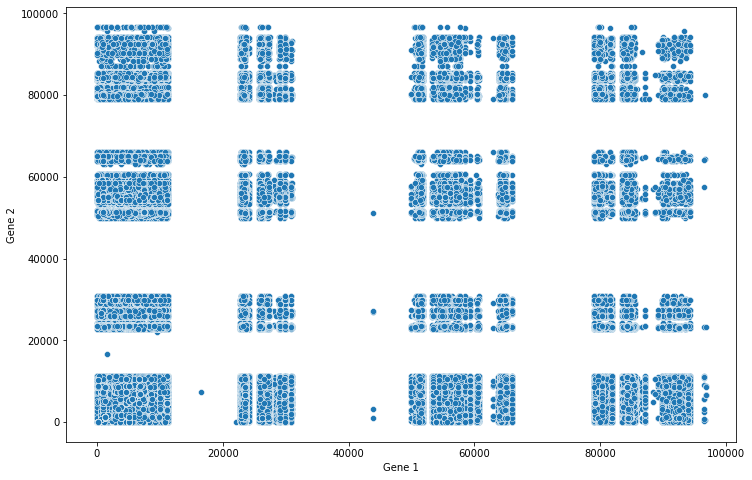

In [9]:
#plot ppi in proteins under 100.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[ppi<100000]);

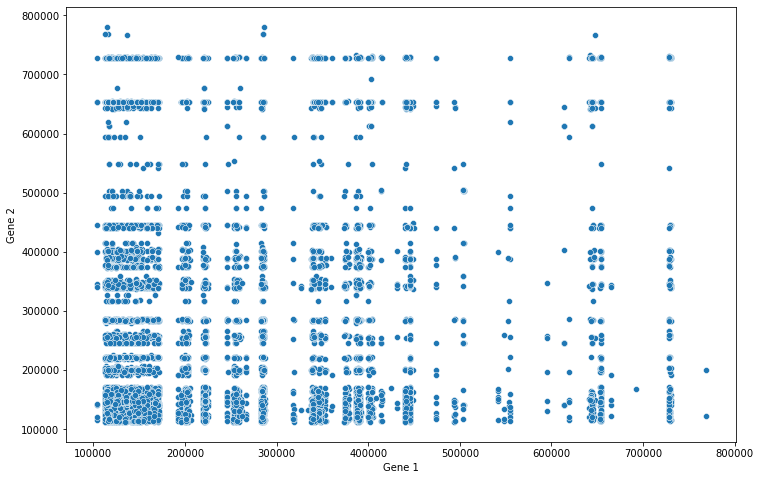

In [10]:
#plot ppi in proteins over 100.000 & under 1.000.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[(ppi>100000) & (ppi<1000000)]);

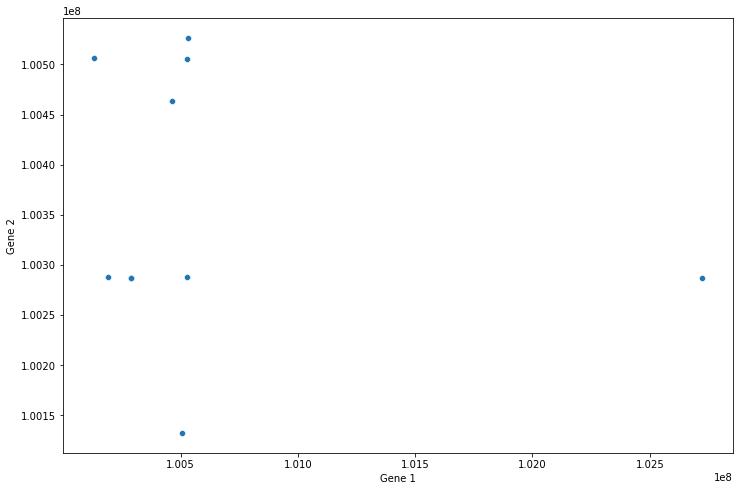

In [11]:
#plot ppi in proteins over 1.000.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[ppi>1000000]);

We see that the data is in groups under 100.000 and between 100.000 and 1.000.000 is a little more sparse and from there on there are some extreme values

In [12]:
#number of unique values from Gene 1 and Gene 2 together
pd.concat([ppi['Gene 1'],ppi['Gene 2']]).nunique()

19081

In [13]:
#number of intersected values from Gene 1 and 2
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique()))

15935

### 2.Drug-target protein associations

In [14]:
targets=pd.read_csv('data/bio-decagon-targets.csv')
targets

,STITCH,Gene
0,CID000003488,1559
1,CID000003488,8647
2,CID000077992,3351
3,CID000077992,3350
4,CID000077992,3352
...,...,...
18685,CID000005152,8484
18686,CID000005152,81491
18687,CID000005152,83551
18688,CID000005152,680


In [15]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18690 entries, 0 to 18689
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STITCH  18690 non-null  object
 1   Gene    18690 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 292.2+ KB


In [16]:
#no nan values
targets.isnull().sum()

STITCH    0
Gene      0
dtype: int64

In [17]:
targets.nunique()

STITCH     284
Gene      3648
dtype: int64

This association has 284 diffent drugs as STITCH (Search Tool for InTeractions of CHemicals) and 3648 different proteins. The matrix has 18690 instances.

In [18]:
#number of unique values from Gene 1, Gene 2 and Gene from targets dataframe
pd.concat([ppi['Gene 1'],ppi['Gene 2'],targets.Gene]).nunique()

19089

In [19]:
#number of intersected values from Gene 1, Gene 2 and Gene from targets dataframe
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique(), targets.Gene.nunique()))

15935

### 3.Drug-target protein associations culled from several curated databases

In [20]:
targets_all=pd.read_csv('data/bio-decagon-targets-all.csv')
targets_all

,STITCH,Gene
0,CID000060752,3757
1,CID006918155,2908
2,CID103052762,3359
3,CID023668479,1230
4,CID000028864,1269
...,...,...
131029,CID000092721,3426
131030,CID000092721,8858
131031,CID000092721,10942
131032,CID100115355,3242


In [21]:
targets_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131034 entries, 0 to 131033
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   STITCH  131034 non-null  object
 1   Gene    131034 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [22]:
#no nan values
targets_all.isnull().sum()

STITCH    0
Gene      0
dtype: int64

In [23]:
targets_all.nunique()

STITCH    1774
Gene      7795
dtype: int64

This association has more drugs than before, 1774 drugs as STITCH (Search Tool for InTeractions of CHemicals) and 7795 different proteins. Also, the dataframe has 131034 instances.

In [24]:
#number of unique values from Gene 1, Gene 2 and Gene from targets_all dataframe
pd.concat([ppi['Gene 1'],ppi['Gene 2'],targets_all.Gene]).nunique()

19122

In [25]:
#number of intersected values from Gene 1, Gene 2 and Gene from targets_all dataframe
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique(), targets_all.Gene.nunique()))

15935

### 4.Polypharmacy side effects in the form of (drug A, side effect type, drug B) triples.

In [26]:
combo=pd.read_csv('data/bio-decagon-combo.csv')
combo

,STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
1,CID000002173,CID000003345,C0035344,retinopathy of prematurity
2,CID000002173,CID000003345,C0004144,atelectasis
3,CID000002173,CID000003345,C0002063,alkalosis
4,CID000002173,CID000003345,C0004604,Back Ache
...,...,...,...,...
4649436,CID000003461,CID000003954,C0149871,deep vein thromboses
4649437,CID000003461,CID000003954,C0035410,rhabdomyolysis
4649438,CID000003461,CID000003954,C0043096,loss of weight
4649439,CID000003461,CID000003954,C0003962,ascites


In [27]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649441 entries, 0 to 4649440
Data columns (total 4 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   STITCH 1                  object
 1   STITCH 2                  object
 2   Polypharmacy Side Effect  object
 3   Side Effect Name          object
dtypes: object(4)
memory usage: 141.9+ MB


In [28]:
#no nan values
combo.isnull().sum()

STITCH 1                    0
STITCH 2                    0
Polypharmacy Side Effect    0
Side Effect Name            0
dtype: int64

In [29]:
combo.nunique()

STITCH 1                     616
STITCH 2                     634
Polypharmacy Side Effect    1317
Side Effect Name            1317
dtype: int64

In this dataframe, we can see 616 different drugs as STITCH 1 and 634 diffent drugs as STITCH 2. Also, Polypharmacy Side Effect and Side Effect Name are 1317 and the observations are 4649441

In [30]:
#counter of values at Side Effect Name column 
count_effects = pd.DataFrame(combo['Side Effect Name'].value_counts())
count_effects.head(20)

,Side Effect Name
arterial pressure NOS decreased,28568
anaemia,27006
Difficulty breathing,26037
nausea,25190
neumonia,24430
Fatigue,24260
Pain,23894
diarrhea,23848
asthenia,23515
emesis,23043


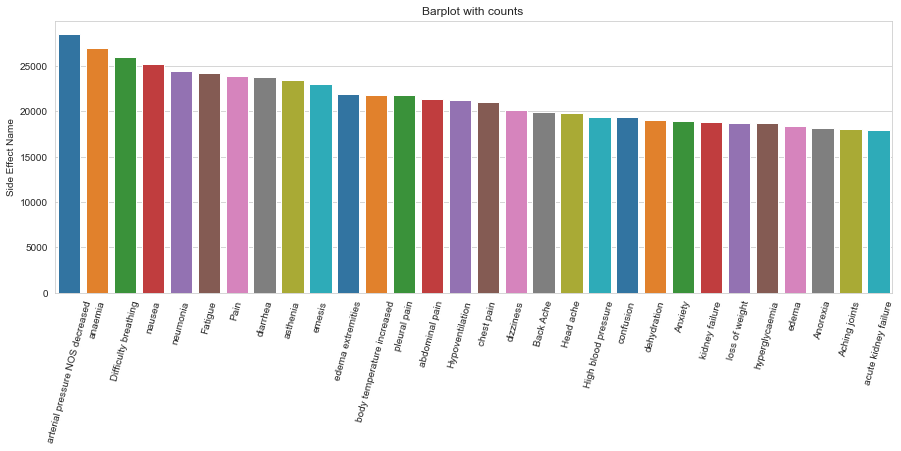

In [31]:
# create a barplot with counts
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title('Barplot with counts ')
sns.barplot(x=count_effects.head(30).index, y='Side Effect Name', data=count_effects.head(30), palette='tab10')
plt.xticks(rotation=75);

In [32]:
#different drugs from 2 columns
pd.concat([combo['STITCH 1'],combo['STITCH 2']]).nunique()

645

In [33]:
#number of intersected values from STITCH 1 and STITCH 2
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique()))

605

In [34]:
#different drugs from combo and targets dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets.STITCH]).nunique()

645

In [35]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from targets dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), targets.STITCH.nunique()))

605

In [36]:
#different drugs from combo and targets_all dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets_all.STITCH]).nunique()

2135

In [37]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from targets_all dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), targets_all.Gene.nunique()))

605

In [38]:
combo[['STITCH 1','STITCH 2']].drop_duplicates()

,STITCH 1,STITCH 2
0,CID000002173,CID000003345
56,CID000005206,CID000009433
68,CID000003929,CID000150610
92,CID000001302,CID000005064
226,CID000005267,CID000010631
...,...,...
4649065,CID000004889,CID000060754
4649085,CID000003075,CID000003339
4649252,CID000002477,CID000002541
4649335,CID000003750,CID000027661


### 5.Side effects of individual drugs in the form of (drug A, side effect type) tuples.

In [39]:
mono=pd.read_csv('data/bio-decagon-mono.csv')
mono

,STITCH,Individual Side Effect,Side Effect Name
0,CID003062316,C1096328,central nervous system mass
1,CID003062316,C0162830,Photosensitivity reaction
2,CID003062316,C1611725,leukaemic infiltration brain
3,CID003062316,C0541767,platelet adhesiveness abnormal
4,CID003062316,C0242973,Ventricular dysfunction
...,...,...,...
174972,CID005282226,C1096278,anterior chamber inflammation
174973,CID005282226,C0272412,splenic abscess
174974,CID005282226,C0860013,hepatitis b antibody positive
174975,CID005282226,C0853225,international normalised ratio increased


In [40]:
#no nan values
mono.isnull().sum()

STITCH                    0
Individual Side Effect    0
Side Effect Name          0
dtype: int64

In [41]:
mono.nunique()

STITCH                      639
Individual Side Effect    10184
Side Effect Name           9702
dtype: int64

This table has 174977 rows and 639 drugs as STITCH. Also, the columns Individual Side Effect and Side Effect Name have 
10184 and 9702 observations respectively.

In [42]:
#counter of values at Side Effect Name column 
count_eff_mono = pd.DataFrame(mono['Side Effect Name'].value_counts())
count_eff_mono.head(30)

,Side Effect Name
general physical health deterioration,301
hypoaesthesia,279
mental status changes,278
tooth extraction,276
emotional distress,275
alanine aminotransferase increased,273
condition aggravated,270
pollakiuria,267
staphylococcal infection,266
bone disorder,263


In [43]:
#different drugs from combo and mono dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],mono.STITCH]).nunique()

645

In [44]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from mono dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), mono.STITCH.nunique()))

605

### 6.Side effect categories

In [45]:
effectcategories=pd.read_csv('data/bio-decagon-effectcategories.csv')
effectcategories

,Side Effect,Side Effect Name,Disease Class
0,C0017152,gastric inflammation,gastrointestinal system disease
1,C0027858,neuroma,benign neoplasm
2,C0041466,Typhoid,bacterial infectious disease
3,C0032807,Post thrombotic syndrome,cardiovascular system disease
4,C0033860,psoriasis,integumentary system disease
...,...,...,...
556,C0001816,agnosia,developmental disorder of mental health
557,C0302592,carcinoma of the cervix,cancer
558,C0270629,epidural abscess,nervous system disease
559,C0038220,status epilepticus,nervous system disease


In [46]:
#no nan values
effectcategories.isnull().sum()

Side Effect         0
Side Effect Name    0
Disease Class       0
dtype: int64

In [47]:
effectcategories.nunique()

Side Effect         561
Side Effect Name    561
Disease Class        37
dtype: int64

This dataframe has 561 observations, which they are uniquely 'Side Effect' ids and 'Side Effect Name' as column names, and it has 37 different names in 'Disease Class'.

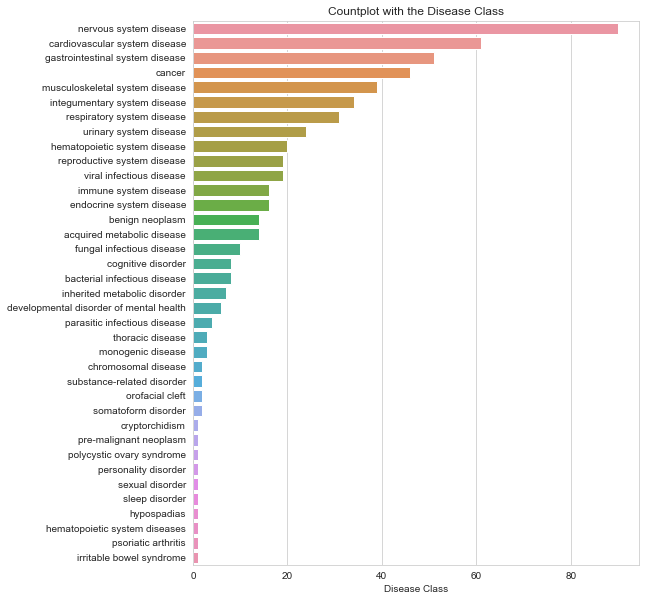

In [48]:
#counter of values at Disease Class column 
count_eff_cat = pd.DataFrame(effectcategories['Disease Class'].value_counts())

# Create a count chart
plt.figure(figsize=(8,10))
plt.title('Countplot with the Disease Class')
sns.barplot(x='Disease Class',y=count_eff_cat.index,data=count_eff_cat);

### 7.Code from main.py

In [49]:
# ###REPLACEMENT
# ppi=pd.read_csv('data/bio-decagon-ppi.csv')
# targets=pd.read_csv('data/bio-decagon-targets.csv')
# combo=pd.read_csv('data/bio-decagon-combo.csv')

# #sampling
# ppi=ppi.sample(frac=0.1, random_state=10)
# targets=targets.sample(frac=0.1, random_state=10)
# combo=combo.sample(frac=0.1, random_state=10)

# gene_net = nx.from_pandas_edgelist(ppi,'Gene 1', 'Gene 2')
# gene_adj = nx.adjacency_matrix(gene_net)
# gene_degrees = np.array(gene_adj.sum(axis=0)).squeeze()

# gene_drug_adj = nx.from_pandas_edgelist(targets,'STITCH', 'Gene')
# gene_drug_adj = nx.adjacency_matrix(gene_drug_adj)
# drug_gene_adj = gene_drug_adj.transpose(copy=True)

# drug_drug_adj_list = []
# grouped = combo.groupby('Polypharmacy Side Effect')
# for name, group in grouped:
#     drug_drug_adj_list.append(nx.adjacency_matrix(nx.from_pandas_edgelist(group,'STITCH 1', 'STITCH 2')))
# drug_degrees_list = [np.array(drug_adj.sum(axis=0)).squeeze() for drug_adj in drug_drug_adj_list]

# val_test_size = 0.05
# n_genes = len(gene_net.nodes)
# n_drugs = pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets.STITCH]).nunique()

# Biobert

In [50]:
# conda install -c pytorch pytorch=1.2.0
# Collecting package metadata (current_repodata.json): done
# Solving environment: failed with initial frozen solve. Retrying with flexible solve.
# Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
# Collecting package metadata (repodata.json): done
# Solving environment: failed with initial frozen solve. Retrying with flexible solve.
# Solving environment: | 
# Found conflicts! Looking for incompatible packages.
# This can take several minutes.  Press CTRL-C to abort.
# failed                                                                                                                                                                        

# UnsatisfiableError: The following specifications were found
# to be incompatible with the existing python installation in your environment:

# Specifications:

#   - pytorch=1.2.0 -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']

# Your python: python=3.8

# If python is on the left-most side of the chain, that's the version you've asked for.
# When python appears to the right, that indicates that the thing on the left is somehow
# not available for the python version you are constrained to. Note that conda will not
# change your python version to a different minor version unless you explicitly specify
# that.


# NEW

,Side Effect Name
arterial pressure NOS decreased,28568
anaemia,27006
Difficulty breathing,26037
nausea,25190
neumonia,24430
Fatigue,24260
Pain,23894
diarrhea,23848
asthenia,23515
emesis,23043


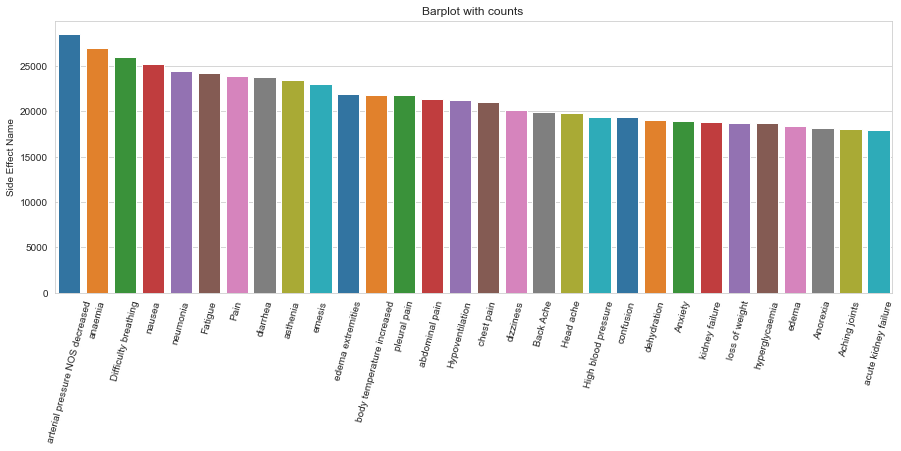

In [51]:
# create a barplot with counts
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title('Barplot with counts ')
sns.barplot(x=count_effects.head(30).index, y='Side Effect Name', data=count_effects.head(30), palette='tab10')
plt.xticks(rotation=75);
count_effects[:13]

In [52]:
combo2 = combo.drop('Polypharmacy Side Effect', axis=1)
combo2

,STITCH 1,STITCH 2,Side Effect Name
0,CID000002173,CID000003345,hypermagnesemia
1,CID000002173,CID000003345,retinopathy of prematurity
2,CID000002173,CID000003345,atelectasis
3,CID000002173,CID000003345,alkalosis
4,CID000002173,CID000003345,Back Ache
...,...,...,...
4649436,CID000003461,CID000003954,deep vein thromboses
4649437,CID000003461,CID000003954,rhabdomyolysis
4649438,CID000003461,CID000003954,loss of weight
4649439,CID000003461,CID000003954,ascites


In [53]:
combo2.merge(effectcategories, on='Side Effect Name').drop('Side Effect',axis=1)

,STITCH 1,STITCH 2,Side Effect Name,Disease Class
0,CID000002173,CID000003345,retinopathy of prematurity,nervous system disease
1,CID000002541,CID000003440,retinopathy of prematurity,nervous system disease
2,CID000000772,CID000002656,retinopathy of prematurity,nervous system disease
3,CID000001972,CID000002764,retinopathy of prematurity,nervous system disease
4,CID000003345,CID000003467,retinopathy of prematurity,nervous system disease
...,...,...,...,...
1651396,CID000002554,CID000028112,Rubella,viral infectious disease
1651397,CID000004112,CID000004900,Rubella,viral infectious disease
1651398,CID000004585,CID000005076,hypogonadotropic hypogonadism,chromosomal disease
1651399,CID000004585,CID000060787,hypogonadotropic hypogonadism,chromosomal disease


In [54]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(combo2, 'STITCH 1', 'STITCH 2', True)

leaderboard = {}
df = pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets.STITCH]).unique()
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
leaderboard = s.to_frame().sort_values('connections', ascending=False)

leaderboard

# from matplotlib.pyplot import figure
# figure(figsize=(10, 8))
# nx.draw_shell(G, with_labels=True)

,connections
CID000004594,599
CID000001983,578
CID000000853,576
CID000003883,552
CID000005039,549
...,...
CID000001134,2
CID000003562,1
CID003086258,1
CID000004011,1


In [55]:
combo2['Side Effect Name'] = combo2['Side Effect Name'].str.replace(' ','_')
combo2

,STITCH 1,STITCH 2,Side Effect Name
0,CID000002173,CID000003345,hypermagnesemia
1,CID000002173,CID000003345,retinopathy_of_prematurity
2,CID000002173,CID000003345,atelectasis
3,CID000002173,CID000003345,alkalosis
4,CID000002173,CID000003345,Back_Ache
...,...,...,...
4649436,CID000003461,CID000003954,deep_vein_thromboses
4649437,CID000003461,CID000003954,rhabdomyolysis
4649438,CID000003461,CID000003954,loss_of_weight
4649439,CID000003461,CID000003954,ascites


In [89]:
import os 

path = '/Users/giorgoslertas/task/data/example'
os.chdir(path)    #os.getcwd() current working file

# create train, test and valid 
# train=combo2.sample(frac=0.8)
# test=combo2.drop(list(train.index.values), axis=0)
# valid=test.sample(frac=0.5)
# test=test.drop(list(valid.index.values), axis=0)

#extract 3 txt files 
combo2.to_csv('train.txt', header=None, index=None, sep=',')
# test.to_csv('test.txt', header=None, index=None, sep=',')
# valid.to_csv('valid.txt', header=None, index=None, sep=',')

relations = pd.DataFrame(combo2['Side Effect Name'].unique())
entities = pd.DataFrame(pd.concat([combo2['STITCH 1'],combo2['STITCH 2']]).unique())
relations.to_csv('relations.dict', header=None, sep=',')
entities.to_csv('entities.dict', header=None, sep=',')

entities=np.load('example_TransE_entity.npy')relation
entities.shape()

entities=np.load('example_TransE_relation.npy')
entities.shape()